<a href="https://colab.research.google.com/github/fdurgam/Trigonometria/blob/main/Actividad_4_Detecci%C3%B3n_de_bordes_y_reconocimiento_de_patrones_geom%C3%A9tricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bordes detectados:


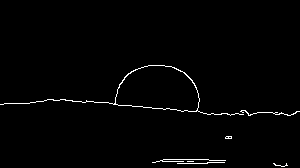

Contornos detectados:


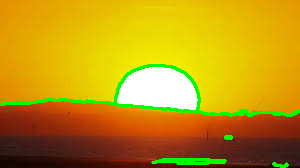

Círculos detectados:


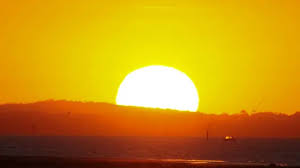

In [12]:
import numpy as np
from google.colab.patches import cv2_imshow

# Cargar una imagen de ejemplo
# Puedes subir una imagen usando files.upload()
# from google.colab import files
# uploaded = files.upload()

# Por ejemplo, si subiste una imagen llamada "imagen.jpg":
image_path = 'amanecer.jpeg'  # Cambia esto por el nombre de tu archivo si subiste uno
image = cv2.imread(image_path)

# Detección de bordes
# Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar el detector de bordes de Canny
edges = cv2.Canny(gray, 100, 200)

# Mostrar los bordes detectados
print("Bordes detectados:")
cv2_imshow(edges)

# Reconocimiento de patrones geométricos
# Encontrar contornos en la imagen de bordes
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos en la imagen original
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Mostrar la imagen con contornos
print("Contornos detectados:")
cv2_imshow(contour_image)

# Detección de Círculos (Ejemplo de Patrón Geométrico)
# Convertir a escala de grises y aplicar suavizado
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Detectar círculos usando la Transformada de Hough
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

# Si se detectan círculos, dibujarlos
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (255, 0, 0), 4)  # Círculo azul para los bordes
        cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Centro del círculo

# Mostrar la imagen con círculos detectados
print("Círculos detectados:")
cv2_imshow(image)